In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Linear Model Selection and Regularization

## Recall the linear model

$$ Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon$$

- Despite its simplicity, the linear model has distinct advantages in terms of its _interpretability_ and often shows good _predictive performance_.

- Hence we discuss in this studying section some ways in which the simple linear model can be improved, by replacing ordinary least squares fitting with some alternative fitting procedures

## Why consider alternatives to least squares?
- **Prediction Accuracy:** especially when $p>n$, to control the variance

- **Model interpretability:** by removing irrelevant features - that is, by setting the corresponding coefficient estimates to zero - we can obtain a model that is more easily interpreted. We will present some approaches for automatically performing _feature selection_.

## Three classes of methods
- **Subset Selection:** we identify a subset of the $p$ predictors that we believe to be related to the response. We then ﬁt a model using least squares on the reduced set of variables. 

- **Shrinkage:** we fit a model involving all $p$ predictors, but the estimated coeffcients are shrunken towards zero relative to the least squares estimates. This shrinkage (also known as _regularization_) has the eﬀect of reducing variance.

- **Dimension Reduction:**  we project the $p$ predictors into a $M$-dimensional subspace, where $M<p$. This is achieved by computing $M$ diﬀerent linear combinations, orprojections, of the variables. Then these $M$ projections are used as predictors to ﬁt a linear regression model by least squares.


## Subset Selection 

### Best Subset Selection 
> 1. Let $M0$ denote the _null model_, which contains no predictors. This model simply predicts the sample mean for each observation.
> 1. For $k = 1 , 2, \cdots,p$:
>        1. Fit all $\frac{p!}{2! (p-2)!}$ models that contain exactly $k$ predictors.
>        2. Pick the best among these $\frac{p!}{2! (p-2)!}$ models, and call it $M_k$. Here _best_ is deﬁned as having the smallest $RSS$, or equivalently largest $R^2$.
> 1. Select a single best model from among $M_0,\cdots,M_p$ using cross-validated prediction error.

Example on Credit data set:

In [2]:
# Reading dataset
credit = pd.read_csv('../../data/raw/credit.csv',).drop(labels=['Unnamed: 0'],axis=1)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


<img src='../../reports/figures/best_subset_selection_predictors.PNG'>

 For each possible model containing a subset of the ten predictors in the `Credit` data set, the $RSS$ and $R^2$ are displayed. The red frontier tracks the best model for a given number of predictors, according to $RSS$ and $R^2$. Though the data set contains only ten predictors, the x-axis ranges from 1 to 11, since one of the variables is categorical and takes on three values, leading to the creation of two dummy variables.

### Extensions to other models
- Although we have presented best subset selection here for least squares regression, the same ideas apply to other types of models, such as logistics regression

- The _deviance_ - negative two times the maximized log-likelihood - plays the role of $RSS$ for a broader class of models.

- For computational reasons, **best subset selection** cannot be applied with very large $p$ 
$$ \text{iterations} = 2^p $$

- **Best subset selection** may also suffer from statistical problems when $p$ is large: larger the search space, the higher the chance of finding models that look good on the training data, even though they might not have any predictive power on future data

- Thus an enourmous search space can lead to _overfitting_ and high variance of the coefficient estimates

- For both of those reasons, _stepwise_ methods, which explore a far more restricted set of models, are attractive alternatives to best subset selection

### Stepwise Selection
#### Forward Stepwise Selection
- Forward stepwise selection begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all of the predictors are in the model

- In particular, at each step the variable that gives the greatest _additional_ improvement to the fit is added to the model

> 1. Let $M0$ denote the _null model_, which contains no predictors.
> 1. For $k = 1 , 2, \cdots,p-1$:
>        1. Consider all $p - k$ models that augment the predictors in $M_k$ with one additional predictor.
>        2. Choose the _best_ among these $p - k$ models, and call it $M_{k+1}$. Here _best_ is deﬁned as having the smallest $RSS$ or highest $R^2$.
> 1. Select a single best model from among $M_0,\cdots,M_{p}$ using cross-validated prediction error.

- Computational advantage over best subset selection is clear

- It is not guaranteed to find the best possible model out of all $2^p$ models containing subsets of the $p$ predictors

<img src='../../reports/figures/forward_stepwise_selection.PNG'>

The ﬁrst four selected models for best subset selection and forward stepwise selection on the `Credit` data set. The ﬁrst three models are identical but the fourth models diﬀer.

#### Barckward Stepwise Selection
- Like forward stepwise selection, backward stepwise selection provides an efficient alternative to best subset selection. 

- However, unlike forward stepwise selection, it begins with the full least squares model containing all $p$ predictors, and then iteratively removes the least useful predictor, one-at-a-time.


> 1. Let $M0$ denote the _full model_, which contains all $p$ predictors.
> 1. For $k = p, p-1, \cdots,1$:
>        1. Consider all $k$ models that contain all but one of the predictors in $M_k$, for the total of $k -1$ predictors.
>        2. Choose the _best_ among these $k$ models, and call it $M_{k-1}$. Here _best_ is deﬁned as having the smallest $RSS$ or highest $R^2$.
> 1. Select a single best model from among $M_0,\cdots,M_{p}$ using cross-validated prediction error.

- Like **forward stepwise selection**, the **backward selection** approach searches through only $1+\frac{p(p+1)}{2}$ models, and so can be applied in settings where $p$ is too large to apply **best subset selection**.

- Like **forward stepwise selection**, **backward stepwise selection** is not guaranteed to yield the best model containing a subset of the $p$ predictors. 

- **Backward selection** requires that the number of samples $n$ is larger than the number of variables $p$ (so that the full model can be ﬁt). In contrast, **forward stepwise** can be used even when $n<p$, and so is the only viable subset method when $p$ is very large.

## Shrinkage methods

- The **subset selection** methods use least squares to ﬁt a linear model that contains a subset of the predictors. 

- As an alternative, we can ﬁt a model containing all p predictors using a technique that _constrains_ or _regularizes_ the coefficient estimates, or equivalently, that _shrinks_ the coefficient estimates towards zero.

- It may not be immediately obvious why such a constraint should improve the fit, but it turns out that shrinking the coefficient estimates can significantly reduce their variance. 

### Ridge Regression
- Recall that the least squares fitting procedure estimates $\beta_0, \beta_1,\cdots,\beta_p$ using the values that minimize:
$$
RSS = \sum^{n}_{i=1}\left ( y_i - \beta_0 - \sum^{p}_{j=1} \beta_j x_{ij} \right )^2
$$

- In contrast, the ridge regression coefficient estimates $\hat{\beta}^{R}$ are values that minimize:
$$
\sum^{n}_{i=1}\left ( y_i - \beta_0 - \sum^{p}_{j=1} \beta_j x_{ij} \right )^2 + \color{Red}{ \lambda \sum^{p}_{j=1}\beta^2_{j} } =
$$
$$
= RSS + \color{Red}{\lambda \sum^{p}_{j=1}\beta^2_{j}}
$$
where $\lambda \geq 0$ is a _tuning parameter_, to be determined separately

- As with least squares, ridge regression seeks coefficient estimates that fit the data well, by making the $RSS$ small. 

- However, the second term, $\lambda \sum^{p}_{j=1}\beta^2_{j}$, called a shrinkage penalty, is small when $\beta_1,\cdots,\beta_p$ are close to zero, and so it has the effect of shrinking the estimates of $\beta_j$ towards zero.

- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.

-  Selecting a good value for $\lambda$ is critical; cross-validation is used for this.


<img src='../../reports/figures/shrinkage_ridge.PNG'>

Let's check out an example of Ridge Regression in Python

In [3]:
# Reading the data
folderName = '../../data/raw/' 
fileName   = 'yacht_hydrodynamics.data'

#Attribute Information:

# Variations concern hull geometry coefficients and the Froude number: 

# 1. Longitudinal position of the center of buoyancy, adimensional. 
# 2. Prismatic coefficient, adimensional. 
# 3. Length-displacement ratio, adimensional. 
# 4. Beam-draught ratio, adimensional. 
# 5. Length-beam ratio, adimensional. 
# 6. Froude number, adimensional. 

# The measured variable is the residuary resistance per unit weight of displacement: 

# 7. Residuary resistance per unit weight of displacement, adimensional. 

header = ['V_{}'.format(i) for i in range(7)]
df = pd.read_csv(folderName+fileName,sep='\s+',names=header,index_col=None)#.reset_index()

# Printing some info about the data
print("[INFO]\nNrow: {}\nNcol: {}".format(df.shape[0],df.shape[1]))
df.head(3)

[INFO]
Nrow: 308
Ncol: 7


,V_0,V_1,V_2,V_3,V_4,V_5,V_6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47


In [4]:
# Setting the target column
target = df.loc[:,df.columns[-1]].values

# If necessary, dropping cols
cols = df.columns
df.drop(labels=cols[-1],axis=1,inplace=True)
df.head(3)

,V_0,V_1,V_2,V_3,V_4,V_5
0,-2.3,0.568,4.78,3.99,3.17,0.125
1,-2.3,0.568,4.78,3.99,3.17,0.150
2,-2.3,0.568,4.78,3.99,3.17,0.175


In [9]:
# Importing libraries
from sklearn.linear_model import Ridge
from sklearn import model_selection
from sklearn import metrics
# Interactive
import ipywidgets as widgets
%matplotlib notebook

In [25]:
def pipeline(lambda_:float) -> None:
    """
    Function that builds a pipeline to execute the cross-validation
    in a Ridge Regression model.
    """
    # Defining the Ridge Regressor
    reg = Ridge(alpha=1./lambda_)
    # Creating variables to save results
    rmse_train=[]
    r2_train=[]

    rmse_test=[]
    r2_test=[]
    # ----------- CROSS VALIDATION ----------- #
    # ---------------- KFold ----------------- #
    cv = model_selection.KFold(n_splits=5,shuffle=False)
    for train_index, test_index in cv.split(df.values):
        X_train, X_test = df.values[train_index,:], df.values[test_index,:]
        y_train, y_test = target[train_index],target[test_index]

        # Fitting the data into the model
        reg.fit(X_train, y_train)

        # FOR TRAINING
        predicted_train = reg.predict(X_train)
        rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, predicted_train)))
        r2_train.append(metrics.r2_score(y_train, predicted_train))

        # FOR TESTING
        predicted_test = reg.predict(X_test)
        rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
        r2_test.append(metrics.r2_score(y_test, predicted_test))

    # Calculating the mean values for train and test scores
    rmse_train = np.array(rmse_train).mean()
    r2_train = np.array(r2_train).mean()

    rmse_test = np.array(rmse_test).mean()
    r2_test = np.array(r2_test).mean()

    # Displaying the results
    print('RMSE Train = {}'.format(round(rmse_train,3)))
    print('R2 Train = {}'.format(round(r2_train,3)))
    print()
    print('RMSE Test = {}'.format(round(rmse_test,3)))
    print('R2 Test = {}'.format(round(r2_test,3)))
    
    def bar_color(array,color1,color2):
        return np.where(array>0,color1,color2).T

    rmse_vals = np.array([rmse_train, rmse_test])
    r2_vals = np.array([r2_train, r2_test])
    ax1.bar(range(2),rmse_vals,width=0.5,ec='k',alpha=0.2,color='b')
    ax2.bar(range(2),r2_vals,width=0.5,ec='k',alpha=0.2,color='b')
    ax3.bar(range(len(reg.coef_)),reg.coef_,width=0.5,ec='k',alpha=0.4,color=bar_color(reg.coef_,'green','red'))
    ax3.set_xticklabels(header)
    ax3.axhline(0,color='k',linestyle='--',alpha=0.7)
    
    plt.draw()


<IPython.core.display.Javascript object>


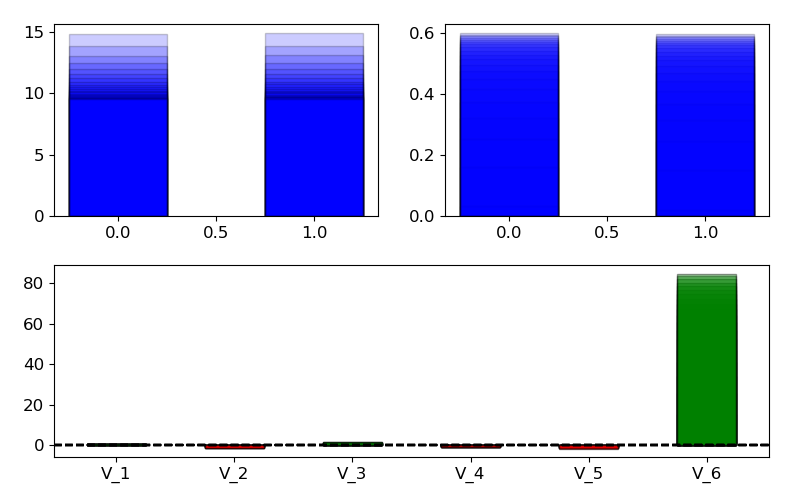

interactive(children=(FloatSlider(value=0.01, description='$\\lambda$', max=1.0, min=0.01, step=0.05), Output(…

In [28]:
fig = plt.figure(constrained_layout=False,figsize=(8,5))
gs = GridSpec(6, 6, figure=fig)
ax1 = fig.add_subplot(gs[:3, :3])
ax2 = fig.add_subplot(gs[:3, 3:])
ax3 = fig.add_subplot(gs[3:, :])
mpl.rcParams.update({'font.size': 12})
fig.tight_layout()

# Defining the float slider widget for hyper parameter tuning
hyper_parameter = widgets.FloatSlider(value=0.01, min=0.01, max=1., step=0.05, description='$\\lambda$')

# Executing widget
_=widgets.interact(pipeline, lambda_=hyper_parameter)

### Lasso Regression
- Ridge regression does have one obvious disadvantage: unlike **subset selection**, which will generally select models that involve just a subset of the variables, ridge regression will include all $p$ predictors in the ﬁnal model.

- The lasso is a relatively recent alternative to ridge regression that overcomes this disadvantage. The lasso coefficients, $\hat{\beta}^{L}_{\lambda}$ , minimize the quantity:
$$
\sum^{n}_{i=1}\left ( y_i - \beta_0 - \sum^{p}_{j=1} \beta_j x_{ij} \right )^2 + \color{Red}{\lambda \sum^{p}_{j=1}\left | \beta_j \right |} =
$$
$$
= RSS + \color{Red}{\lambda \sum^{p}_{j=1}\left | \beta_j \right |}
$$

- In statistical parlance, the lasso uses an $l_1$ (pronounced “ell 1”) penalty instead of an $l_2$ penalty. The $l_1$ norm of a coefficient vector $\beta$ is given by $\left \| \beta \right \|_1 = \sum {\left | \beta_j \right |}$. 

- In the case of the lasso, the $l_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. 

- Hence, much like best subset selection, the lasso performs variable selection. 

- We say that the lasso yields sparse models — that is, sparse models that involve only a subset of the variables. 

- As in ridge regression, selecting a good value of λ for the lasso is critical; cross-validation is again the method of choice.


<img src='../../reports/figures/shrinkage_lasso.PNG'>

Why is it that the lasso, unlike the ridge regression, results in coefficient estimates that are exactly equal to zero?


<img src='../../reports/figures/shrinkage_ridge_lasso_coef.PNG'>


Let's check out an example of Ridge Regression in Python

In [29]:
# Importing libraries
from sklearn.linear_model import Lasso

In [30]:
def pipeline(lambda_:float) -> None:
    """
    Function that builds a pipeline to execute the cross-validation
    in a Lasso Regression model.
    """
    # Defining the Ridge Regressor
    reg = Lasso(alpha=1./lambda_)
    # Creating variables to save results
    rmse_train=[]
    r2_train=[]

    rmse_test=[]
    r2_test=[]
    # ----------- CROSS VALIDATION ----------- #
    # ---------------- KFold ----------------- #
    cv = model_selection.KFold(n_splits=5,shuffle=False)
    for train_index, test_index in cv.split(df.values):
        X_train, X_test = df.values[train_index,:], df.values[test_index,:]
        y_train, y_test = target[train_index],target[test_index]

        # Fitting the data into the model
        reg.fit(X_train, y_train)

        # FOR TRAINING
        predicted_train = reg.predict(X_train)
        rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, predicted_train)))
        r2_train.append(metrics.r2_score(y_train, predicted_train))

        # FOR TESTING
        predicted_test = reg.predict(X_test)
        rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))
        r2_test.append(metrics.r2_score(y_test, predicted_test))

    # Calculating the mean values for train and test scores
    rmse_train = np.array(rmse_train).mean()
    r2_train = np.array(r2_train).mean()

    rmse_test = np.array(rmse_test).mean()
    r2_test = np.array(r2_test).mean()

    # Displaying the results
    print('RMSE Train = {}'.format(round(rmse_train,3)))
    print('R2 Train = {}'.format(round(r2_train,3)))
    print()
    print('RMSE Test = {}'.format(round(rmse_test,3)))
    print('R2 Test = {}'.format(round(r2_test,3)))
    
    def bar_color(array,color1,color2):
        return np.where(array>0,color1,color2).T

    rmse_vals = np.array([rmse_train, rmse_test])
    r2_vals = np.array([r2_train, r2_test])
    ax1.bar(range(2),rmse_vals,width=0.5,ec='k',alpha=0.2,color='b')
    ax2.bar(range(2),r2_vals,width=0.5,ec='k',alpha=0.2,color='b')
    ax3.bar(range(len(reg.coef_)),reg.coef_,width=0.5,ec='k',alpha=0.4,color=bar_color(reg.coef_,'green','red'))
    ax3.set_xticklabels(header)
    ax3.axhline(0,color='k',linestyle='--',alpha=0.7)
    
    plt.draw()


<IPython.core.display.Javascript object>


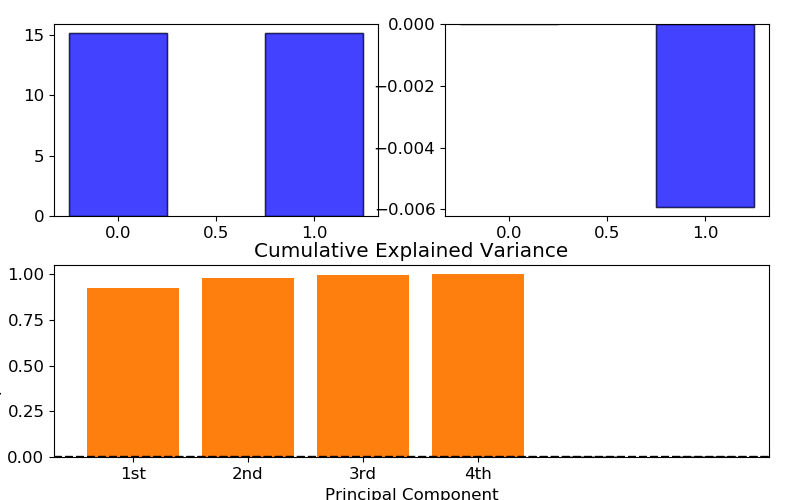

interactive(children=(FloatSlider(value=0.01, description='$\\lambda$', max=3.0, min=0.01, step=0.05), Output(…

In [34]:
fig = plt.figure(constrained_layout=False,figsize=(8,5))
gs = GridSpec(6, 6, figure=fig)
ax1 = fig.add_subplot(gs[:3, :3])
ax2 = fig.add_subplot(gs[:3, 3:])
ax3 = fig.add_subplot(gs[3:, :])
mpl.rcParams.update({'font.size': 12})
fig.tight_layout()

# Defining the float slider widget for hyper parameter tuning
hyper_parameter = widgets.FloatSlider(value=0.01, min=0.01, max=3., step=0.05, description='$\\lambda$')

# Executing widget
_=widgets.interact(pipeline, lambda_=hyper_parameter)

### Conclusions

- In general, one might expect the lasso to perform better in a setting where a relatively small number of predictors have substantial coefficients, and the remaining predictors have coefficients that are very small or that equal zero. 

- Ridge regression will perform better when the response is a function of many predictors, all with coefficients of roughly equal size. 

- However, the number of predictors that is related to the response is never known _a priori_ for real data sets. 

-  A technique such as cross-validation can be used in order to determine which approach is better on a particular data set. 

## Dimension Reduction Methods

- The methods that we have discussed so far have involved fitting linear regression models, via least squares or shruken approach, using the original predictors, $X_1,X_2,\cdots,X_p$

-  We now explore a class of approaches that _transform_ the predictors and then ﬁt a least squares model using the transformed variables. We will refer to these techniques as _dimension reduction_ methods.

### Principal Components Regression

- Here we apply principal component analysis (PCA) to define the linear combinations of the predictors, for use in our regression

- The first principal component is that (normalized) linear combination of the variables with the largest variance

- The second principal component has largest variance, subject to being uncorrelated with the first

- Hence with many correlated original variables, we replace them with a small set of principal components that capture their joint variation


<img src='../../reports/figures/pca_explained.PNG'>


Let's see an example of PCA in Python:

In [37]:
# Importing library
from sklearn import datasets
from sklearn.decomposition import PCA

In [68]:
# Importing data
iris = datasets.load_iris()

x = iris.data
y = iris.target

In [64]:
def pipeline_pca(n_components:int) -> None:
    """
    Function that builds a pipeline to analyse the PCA with variable
    number of components
    """
    # Executing PCA
    pca = PCA(n_components=n_components)
    pca.fit(x)
    
    # Plot the Explained Variance
    range_x = np.arange(n_components)
    
    ax[0].bar(range_x, pca.explained_variance_ratio_,color='b',ec='k',width=0.5,alpha=0.3)
    ax[0].set_xticks(range_x)
    ax[0].set_xticklabels(['1st', '2nd', '3rd', '4th'])
    ax[0].set_xlabel('Principal Component')
    ax[0].set_ylabel('Explained Variance Ratio')
    ax[0].set_title('Explained Variance')

    ax[1].bar(range_x,np.cumsum(pca.explained_variance_ratio_),color='orange',ec='k',width=0.5,alpha=0.3)
    ax[1].set_xticks(range_x)
    ax[1].set_xticklabels(['1st', '2nd', '3rd', '4th'])
    ax[1].set_xlabel('Principal Component')
    ax[1].set_ylabel('Cumulative Explained Variance Ratio')
    ax[1].set_title('Cumulative Explained Variance')
    
    plt.draw()

    d = {'Component': np.r_[1:len(pca.explained_variance_ratio_)+1], 
         'Explained Variance': pca.explained_variance_ratio_, 
         'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)}
    df = pd.DataFrame(data=d)

    print(df)

<IPython.core.display.Javascript object>


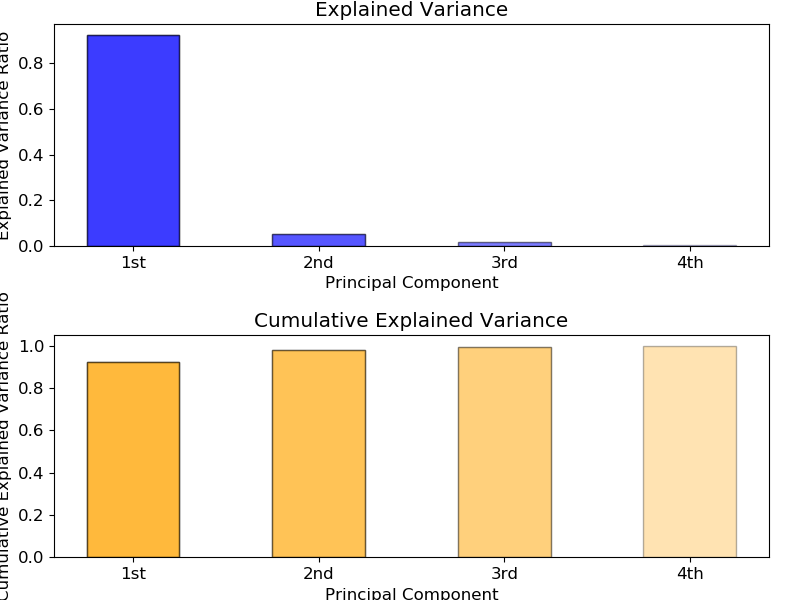

interactive(children=(IntSlider(value=1, description='$Number of components: $', max=4, min=1), Output()), _do…

In [65]:
fig,ax = plt.subplots(2,1,figsize=(8,6))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

# Defining the float slider widget for hyper parameter tuning
n_components = widgets.IntSlider(value=1, min=1, max=4, step=1, description='$Number of components: $')

# Executing widget
_=widgets.interact(pipeline_pca, n_components=n_components)